# Employment and Attrition Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
#numpy allows us to perform analysis on large data

In [2]:
data=pd.read_csv('/Users/dikshya/Desktop/Employeedata.csv') 
 #importdataset and data is the name given for dataframe.it can be any name like df

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee_ID                14900 non-null  int64 
 1   Age                        14900 non-null  int64 
 2   Gender                     14900 non-null  object
 3   Years                      14900 non-null  int64 
 4   Role                       14900 non-null  object
 5   Income                     14900 non-null  int64 
 6   Worklife_Balance           14900 non-null  object
 7   Job_Satisfaction           14900 non-null  object
 8   Performance _Rating        14900 non-null  object
 9    Promotions                14900 non-null  int64 
 10  Overtime                   14900 non-null  object
 11   Home_Distance             14900 non-null  int64 
 12  Education                  14900 non-null  object
 13  Marital_Status             14900 non-null  object
 14  Depend

# Data Cleaning

In [4]:
# Returns dataset removing duplicates
data = data.drop_duplicates()


In [5]:
#checking for null values
data.isnull()


,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.drop_duplicates()

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


# Data Analysis

In [7]:
data.describe() #returns the statistical summary of the dataframe 
#count, mean, median (or 50th percentile) standard variation, min-max, 

,Employee_ID,Age,Years,Income,Promotions,Home_Distance,Dependents,Company_Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


The standard deviation refers to dispersion of data in relation to the mean/average.The distance bettween each data point and mean.

In [8]:
data.head(10)
#first 10 columns

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
5,3496,45,Female,30,Healthcare,8104,Fair,High,Average,0,...,0,Senior,Large,75,No,No,No,Good,Low,Stayed
6,46775,22,Female,5,Healthcare,8700,Good,High,Average,0,...,0,Mid,Small,48,No,No,No,Poor,High,Stayed
7,72645,34,Female,15,Technology,11025,Fair,Medium,High,1,...,4,Entry,Large,16,No,No,No,Good,Low,Left
8,4941,48,Female,40,Technology,11452,Good,Medium,Below Average,0,...,1,Mid,Large,52,No,No,No,Good,Medium,Stayed
9,65181,55,Female,16,Media,5939,Poor,High,Average,0,...,1,Entry,Small,46,No,No,No,Good,High,Stayed


In [9]:
data.tail(10)
#last 10 columns

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
14890,54362,30,Female,6,Media,6353,Fair,Medium,Below Average,0,...,3,Senior,Small,31,Yes,No,No,Good,Very High,Stayed
14891,44995,39,Male,25,Finance,11586,Good,High,Average,0,...,2,Entry,Medium,58,No,No,No,Good,Low,Left
14892,16169,47,Male,13,Education,4024,Fair,Low,Below Average,2,...,6,Mid,Large,24,Yes,No,Yes,Good,Medium,Stayed
14893,6323,34,Male,25,Media,6717,Good,High,High,1,...,0,Mid,Large,98,No,No,No,Good,Medium,Stayed
14894,68796,52,Male,13,Technology,9296,Poor,High,Average,1,...,1,Entry,Small,55,No,Yes,No,Poor,Low,Stayed
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed
14899,73042,59,Female,48,Education,3774,Good,High,Below Average,1,...,4,Mid,Large,118,No,No,No,Good,Very High,Left


In [10]:
data.mean()
#mean of dataset numerical values

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_13678/3920377326.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Employee_ID       37339.022081
Age                  38.385235
Years                15.592416
Income             7287.306040
 Promotions           0.834362
 Home_Distance       49.927315
Dependents            1.659329
Company_Tenure       55.603624
dtype: float64

In [11]:
data.median()
 #median of dataset numerical values

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_13678/51376076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Employee_ID       37433.0
Age                  38.0
Years                13.0
Income             7332.0
 Promotions           1.0
 Home_Distance       50.0
Dependents            1.0
Company_Tenure       56.0
dtype: float64

In [12]:

#Median of first 100

#To calculate the first 100 datas median we calculate the first 100 using head functtion and use median function
first_100 = data.head(100)

first_100.median()

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_13678/644049177.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  first_100.median()


Employee_ID       33233.0
Age                  38.0
Years                12.0
Income             7756.0
 Promotions           1.0
 Home_Distance       50.0
Dependents            1.5
Company_Tenure       56.0
dtype: float64

# Attrition Analysis

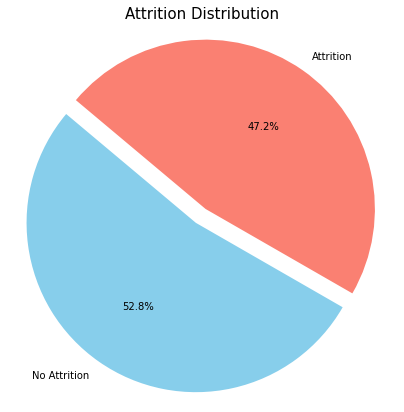

In [13]:
#To create Attrition Pie Chart
#Firstly count the attrition yes and no
Attrition_Count=data['Attrition'].value_counts()
labels = ['No Attrition', 'Attrition']
sizes = Attrition_Count.values #This determines the size by value
colors = ['skyblue', 'salmon']  # Colors for the pie slices

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Attrition Distribution', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


## Interestingly enough,the numbers are pretty close.The number of people who did not leave is slightly higher by 6.6%.

### Interestingly enough,the numbers are pretty close.The number of people who did not leave is slightly higher by 5.6%.

<AxesSubplot:title={'center':'Attrition Rate'}>

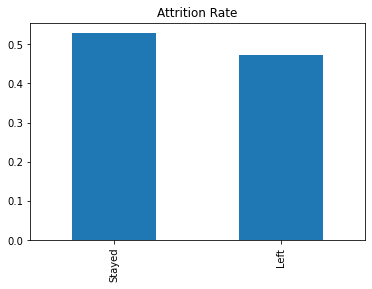

In [14]:
data['Attrition'].value_counts(normalize=True).plot(kind='bar', title='Attrition Rate')


In [15]:
Attrition_Role = data.groupby(['Role', 'Attrition']).size()
print(Attrition_Role)

Role        Attrition
Education   Left         1551
            Stayed       1617
Finance     Left          979
            Stayed       1084
Healthcare  Left         1658
            Stayed       1774
Media       Left         1078
            Stayed       1344
Technology  Left         1766
            Stayed       2049
dtype: int64


<AxesSubplot:xlabel='Role', ylabel='count'>

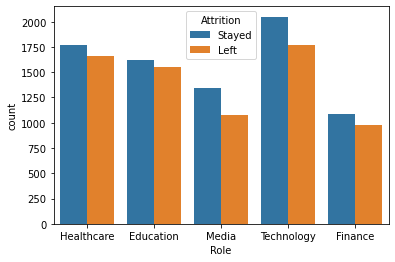

In [16]:
sns.countplot(x='Role', hue='Attrition', data=data)


 Key Findings:

Attrition is highest in the Technology industry (1766), followed closely by Healthcare (1658).
The lowest attrition is in the Finance industry (979).
All industries show more employees staying than leaving, indicating a retention majority across sectors.

# Attrition by Age group and Career Stages

We will be creating age bins to group ages based on career stages considering the career trajectory is normal or without any major gaps.

18–25: "Early Career"
26–35: "Mid Career"
36–45: "Experienced Professional"
46–60: "Late Career"
60+: "Retired/Pre-retired"


In [17]:
bins_age = [18, 25, 35, 45, 60 ]  
labels_age = ["Early Career", "Mid Career", "Experienced Professional", "Late Career", ]
data['Age_Group'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)



In [18]:
print(data[['Age','Age_Group']].head())

   Age                 Age_Group
0   36  Experienced Professional
1   35                Mid Career
2   50               Late Career
3   58               Late Career
4   39  Experienced Professional


In [19]:
attrition_age= data.groupby(['Age_Group', 'Attrition']).size()
print(attrition_age)

Age_Group                 Attrition
Early Career              Left         1275
                          Stayed       1184
Mid Career                Left         1775
                          Stayed       1903
Experienced Professional  Left         1606
                          Stayed       1956
Late Career               Left         2170
                          Stayed       2675
dtype: int64


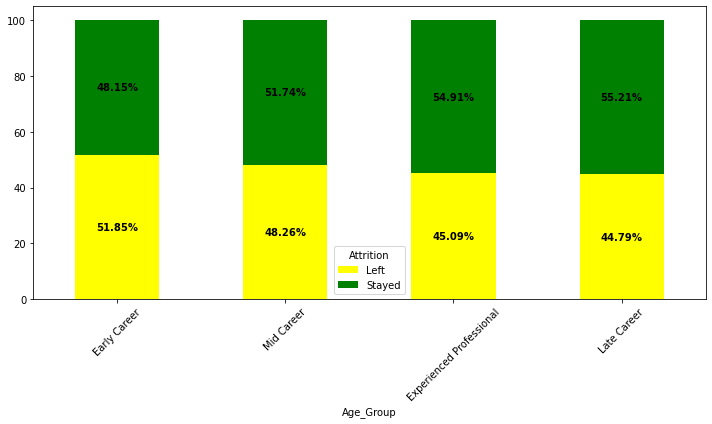

In [20]:
attrition_pivot = attrition_age.unstack(fill_value=0)

# Calculate the percentage of 'Left' and 'Stayed' for each 'Age_Group'
attrition_percentage = attrition_pivot.div(attrition_pivot.sum(axis=1), axis=0) * 100


# Plotting
ax = attrition_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['yellow', 'green'])

for c in ax.containers:
    
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # create custom labels with the bar height and the percent from the per column
    # the column labels in per and dfp are int, so convert label to int
    labels = [f'{v.get_height():0.2f}%' if v.get_height() >0 else '' for v in c]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')
    

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can conclude that typically people in early career/earlier age groups leave job for various reasons.It is the only category where rate of attrition is higher.In rest of the age group the number of people who stayed is higher.In late career however the percentage of people who stay at work is higer by 10.42% in comparision to people who left.This reflects older age group where employees may have been in job industry for a long time are comfortable with where they are at and try not to change jobs.It can also mean that people at older age group are close to retirinng so thyeir attrition low is late.

In [21]:
attrition_percentage

Attrition,Left,Stayed
Age_Group,,
Early Career,51.850346,48.149654
Mid Career,48.259924,51.740076
Experienced Professional,45.087030,54.912970
Late Career,44.788442,55.211558


#  Attrition  and Income

For Income bins lets assume
< 3,000: "Low Income"
4,000–6,000: "Middle Income"
7,000–10,000: "Upper Middle Income"
10,000: "High Income"

In [22]:
# Income Bins
bins_income = [0, 3000, 6000, 10000, float('inf')]  
labels_income = ["Low Income", "Middle Income", "Upper Middle Income", "High Income"]

data['Income_Group'] = pd.cut(data['Income'], bins=bins_income, labels=labels_income)


In [23]:
print(data[['Income', 'Income_Group']].head())

   Income         Income_Group
0    8029  Upper Middle Income
1    4563        Middle Income
2    5583        Middle Income
3    5525        Middle Income
4    4604        Middle Income


In [24]:
attrition_income= data.groupby(['Income_Group', 'Attrition']).size()
print(attrition_income)

Income_Group         Attrition
Low Income           Left           39
                     Stayed         49
Middle Income        Left         2167
                     Stayed       2396
Upper Middle Income  Left         4055
                     Stayed       4571
High Income          Left          771
                     Stayed        852
dtype: int64


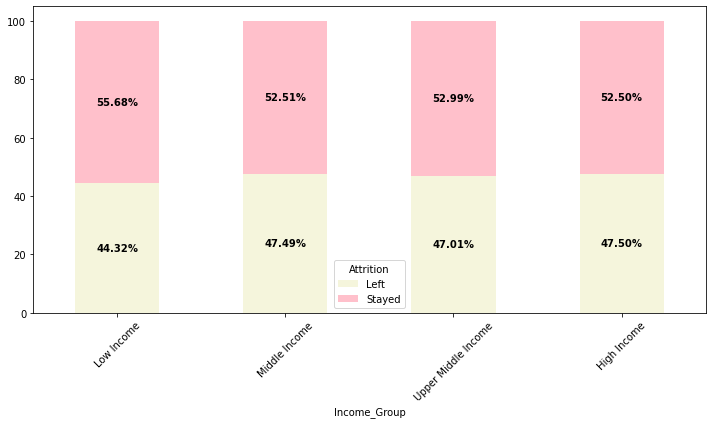

In [25]:
attrition_pivot = attrition_income.unstack(fill_value=0)

# Calculate the percentage of 'Left' and 'Stayed' for each 'Age_Group'
attrition_percentage = attrition_pivot.div(attrition_pivot.sum(axis=1), axis=0) * 100

# Plotting
ax = attrition_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['beige', 'pink'])
for c in ax.containers:
    
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # create custom labels with the bar height and the percent from the per column
    # the column labels in per and dfp are int, so convert label to int
    labels = [f'{v.get_height():0.2f}%' if v.get_height() >0 else '' for v in c]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')
    


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this dataset people making less money have have lower attrition rate by 11.36% compared to rest income levels.This can possibly relfect that they are not in financial position to leave a job even though they make less.Rest of the income groups seem to have similar ratio so I donot think income is a major factor in people's decision to leave a company.

# Home Distance and Attrition

In [26]:
bins_distance = [0, 7, 14, 21, 28, float('inf')]
labels_distance = ["Very Close", "Close", "Moderate Commute", "Far Commute", "Very Far Commute"]
data['Home_Distance_Category'] = pd.cut(data[' Home_Distance'], bins=bins_distance, labels=labels_distance)


In [27]:
print(data[['Home_Distance_Category',' Home_Distance']].head())

  Home_Distance_Category   Home_Distance
0       Very Far Commute              83
1       Very Far Commute              55
2                  Close              14
3       Very Far Commute              43
4       Very Far Commute              47


In [28]:
attrition_distance= data.groupby(['Home_Distance_Category', 'Attrition']).size()
print(attrition_distance)

Home_Distance_Category  Attrition
Very Close              Left          436
                        Stayed        621
Close                   Left          446
                        Stayed        667
Moderate Commute        Left          445
                        Stayed        586
Far Commute             Left          477
                        Stayed        551
Very Far Commute        Left         5228
                        Stayed       5443
dtype: int64


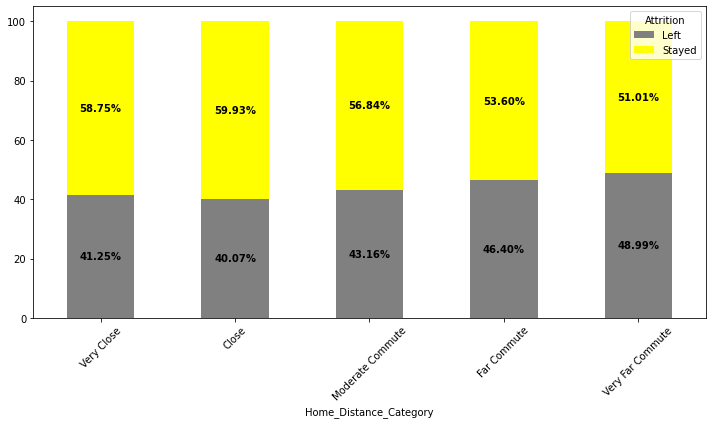

In [29]:
attrition_pivot = attrition_distance.unstack(fill_value=0)

# Calculate the percentage of 'Left' and 'Stayed' for each 'Age_Group'
attrition_percentage = attrition_pivot.div(attrition_pivot.sum(axis=1), axis=0) * 100

# Plotting
ax = attrition_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['grey', 'yellow'])
for c in ax.containers:
    
    # get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # create custom labels with the bar height and the percent from the per column
    # the column labels in per and dfp are int, so convert label to int
    labels = [f'{v.get_height():0.2f}%' if v.get_height() >0 else '' for v in c]
    
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')
    


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall we can conclude that distance does play a huge factor in emplopyee attrition.As we see above the closer distance have less attrition rates very close  being 41.25% and close being 40.07%.Far and very far commute have the most attrition rates.46.40% and 48.99% respectively.

# Performance and Attrition

# ANOVA Testing

Null Hypothesis (
𝐻
0
H 
0
​
 ): There is no significant relationship between performance and attrition.
 
 
Alternative Hypothesis (
𝐻
𝑎
H 
a
​
 ): There is a significant relationship between performance and attrition.

In [30]:
# Perform one-way ANOVA for Performance Rating vs Attrition
f_stat, p_value = stats.f_oneway(
    *(group['Attrition'].eq('Left').astype(int) for _, group in data.groupby('Performance _Rating'))
)

# Output the results
print(f"F-statistic: {f_stat}\nP-value: {p_value}")
print("Reject the null hypothesis: Significant differences exist." if p_value < 0.05 else "Fail to reject the null hypothesis: No significant differences.")


F-statistic: 12.749933213279911
P-value: 2.5613237605916736e-08
Reject the null hypothesis: Significant differences exist.


Tukey's HSD (Honest Significant Difference): Compares all possible pairs of means and is widely used in ANOVA.​ We will be using this to analyze thge differences.


In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(endog=data['Attrition'].apply(lambda x: 1 if x == 'Left' else 0),
                          groups=data['Performance _Rating'],
                          alpha=0.05)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
      Average Below Average   0.0487 0.0003  0.0181  0.0792   True
      Average          High   0.0093 0.8133 -0.0177  0.0362  False
      Average           Low   0.0946    0.0  0.0468  0.1424   True
Below Average          High  -0.0394 0.0253 -0.0753 -0.0034   True
Below Average           Low   0.0459 0.1207 -0.0075  0.0994  False
         High           Low   0.0853 0.0001  0.0339  0.1368   True
------------------------------------------------------------------


## Significant Differences (Reject=True):



**Average vs. Below Average:** A significant mean difference of 0.0487. The adjusted p-value is 
0.0003, indicating a highly significant difference.

**Average vs. Low:** A significant mean difference of 0.0946 with a p-value of 
0.0 suggesting a very strong difference.

**Below Average vs. High:** Significant mean difference of -0.0394 (negative means High has a lower mean value than Below Average).

**High vs. Low:** Significant mean difference of 0.0853, indicating Low has a higher mean.





## No Significant Differences (Reject=False):


**Average vs. High:** The small difference in means (0.0093) and the large p-value (0.8133) show no significant difference between these groups.

**Below Average vs. Low:** The p-value of 0.1207 indicates no significant difference between these groups, even though the mean difference is 0.0459.


# Promotions & Attrition

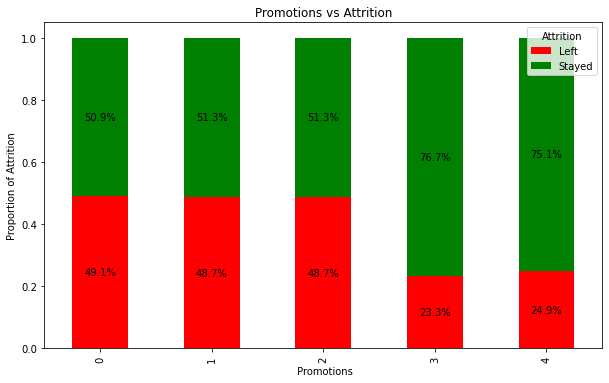

In [32]:


promotions_attrition = pd.crosstab(data[' Promotions'], data['Attrition'], normalize='index')

# Plotting the stacked bar chart
ax = promotions_attrition.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10,6))

# Adding title and labels
plt.title('Promotions vs Attrition')
plt.xlabel(' Promotions')
plt.ylabel('Proportion of Attrition')

# Annotate percentages
for p in ax.patches:
    height = p.get_height()  # height of each bar
    width = p.get_width()    # width of each bar
    x = p.get_x()            # x-coordinate of the bar
    y = p.get_y()            # y-coordinate of the bar
    
    # Calculate the percentage (height is the proportion)
    percentage = height * 100  # multiply by 100 to get percentage

    # Annotating the percentage in the middle of the bars
    ax.text(x + width/2, y + height/2, f'{percentage:.1f}%', 
            ha='center', va='center', fontsize=10, color='black')

plt.show()



Employees who have been promoted over 2 times  are most likely to remain at the company.The attrition rate for 3 and 4 times promoted employees are 23.3% and 24.9% only.

In [33]:
#Change Categorical Columns Into Numerical

new_data = pd.get_dummies(data[['Attrition']])

print(new_data.to_string())

       Attrition_Left  Attrition_Stayed
0                   0                 1
1                   1                 0
2                   0                 1
3                   1                 0
4                   0                 1
5                   0                 1
6                   0                 1
7                   1                 0
8                   0                 1
9                   0                 1
10                  0                 1
11                  0                 1
12                  0                 1
13                  0                 1
14                  1                 0
15                  0                 1
16                  0                 1
17                  1                 0
18                  0                 1
19                  0                 1
20                  1                 0
21                  1                 0
22                  1                 0
23                  0                 1


In [34]:
left_count = new_data['Attrition_Left'].sum()
stayed_count = new_data['Attrition_Stayed'].sum()
print(f"Total Attrition_Left: {left_count}")
print(f"Total Attrition_Stayed: {stayed_count}")

Total Attrition_Left: 7032
Total Attrition_Stayed: 7868


In [36]:
# Group by Remote Work and Attrition
remote_attrition = new_data.groupby([Attrition']).size().unstack(fill_value=0)

# Add total employees in each group and calculate attrition rates
remote_attrition['Total'] = remote_attrition.sum(axis=1)
remote_attrition['Attrition_Rate'] = remote_attrition[1] / remote_attrition['Total'] * 100

# Display summary
print(remote_attrition)

SyntaxError: EOL while scanning string literal (3965403214.py, line 2)

<AxesSubplot:>

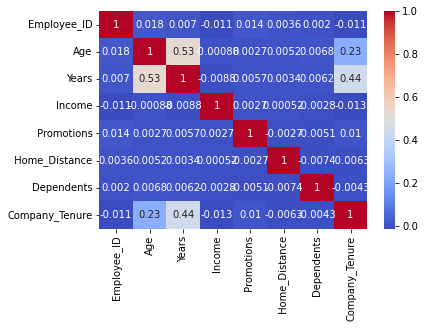

In [37]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Lets explore on different categories

# Remote Work

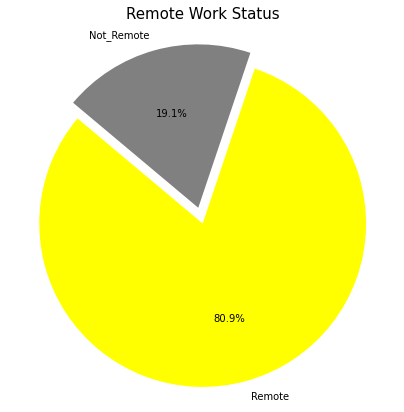

In [38]:
 #Pie to see Employee_RemoteworK   


#Firstly count the attrition yes and no
Remote_Work_count=data['Remote_Work'].value_counts()
labels = ['Remote', 'Not_Remote']
sizes = Remote_Work_count.values
colors = ['yellow', 'grey']  # Colors for the pie slices

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Remote Work Status', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



# Total Employees By Job Level

In [39]:
job_level_counts = data.groupby('Job_Level').size().reset_index(name='Total_Employees')

# Step 3: Display the result
print(job_level_counts)


  Job_Level  Total_Employees
0     Entry             5913
1       Mid             5925
2    Senior             3062


<AxesSubplot:xlabel='Job_Level', ylabel='Total_Employees'>

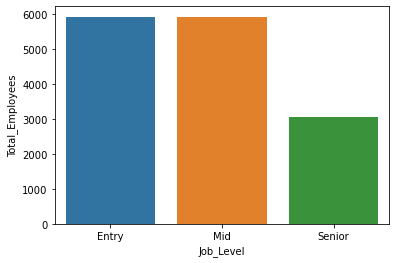

In [40]:
sns.barplot(x='Job_Level',y='Total_Employees',data= job_level_counts)

We see most of the people in dataset are entry or mid level employees.The number of people working in senior level is few which is understandable because there are limited senior level positions in each company.

# Remote Work by Job Level

In [61]:
Remotework_Joblevel = data.groupby(['Job_Level', 'Remote_Work']).size()
print(Remotework_Joblevel)


Job_Level  Remote_Work
Entry      No             4798
           Yes            1115
Mid        No             4772
           Yes            1153
Senior     No             2491
           Yes             571
dtype: int64


Lets find if job remote w work status ios determined by job level.

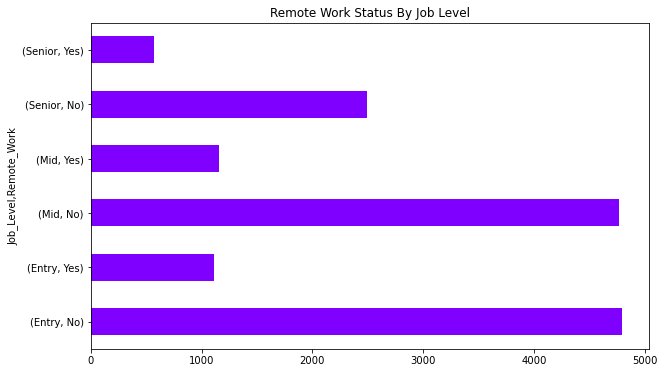

In [62]:
x = Remotework_Joblevel.plot.barh(stacked=True, figsize=(10, 6), colormap='rainbow',title='Remote Work Status By Job Level')



In each job level we can see that most of the employees do not have a remote job.As mentioned above in this survey most of the responders  are in entry or mid levelp of their careers .It seems that job levels determine remote work status and it maybe solely based on role as well as company's organizational model.

# Promotions

In [63]:
promotions_count = data.groupby(' Promotions').size().reset_index(name= 'Number_of_promotions')
print (promotions_count)

    Promotions  Number_of_promotions
0            0                  7429
1            1                  3716
2            2                  2750
3            3                   804
4            4                   201


<AxesSubplot:xlabel=' Promotions', ylabel='Number_of_promotions'>

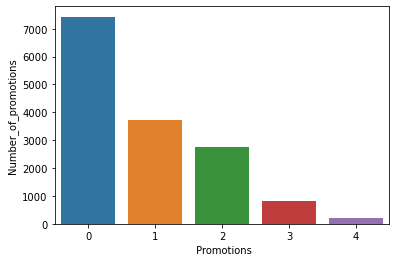

In [64]:
sns.barplot(x= ' Promotions',y= 'Number_of_promotions',data=promotions_count)


When we were calculating the mean above,the mean for promotions was 0.834362 which is evident because as we see over 7000 of the survey respondents have not have as promotions in their career yet.This is quite surprising so see as the numbers are hugely different from one another.

In [65]:
#sns.barplot(x='Role',y='Income',data)

<AxesSubplot:xlabel='Remote_Work', ylabel='Income'>

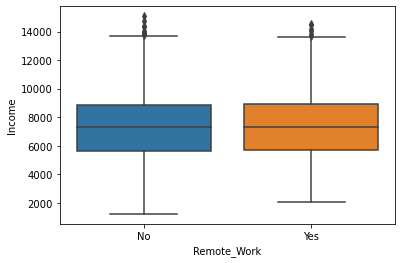

In [66]:
sns.boxplot(data=data,x='Remote_Work',y='Income')

# Highest  & Lowest Paid Job Fields

<AxesSubplot:xlabel='Role', ylabel='Income'>

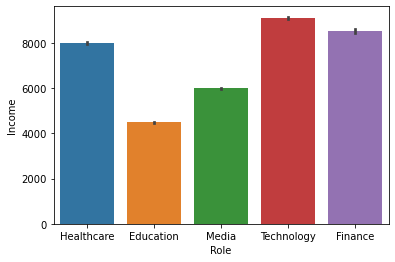

In [67]:
sns.barplot(x='Role',y='Income',data=data)

In [68]:
income_average_role = data.groupby('Role')['Income'].mean()
print(income_average_role)

Role
Education     4489.901831
Finance       8525.973340
Healthcare    8004.900932
Media         5994.212221
Technology    9115.849541
Name: Income, dtype: float64


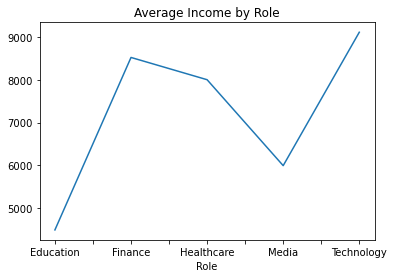

In [69]:
lines = income_average_role.plot.line(x='Role', y='Income', title='Average Income by Role')


In [70]:
#Top  500 Highest Paid Employee and their role
Highest=data.sort_values('Income',ascending=False) 
Top_500 = Highest.head(500)
print(Top_500[['Employee_ID','Income','Role']])



       Employee_ID  Income        Role
14454        44059   15063     Finance
8643         62836   14707     Finance
12675         3283   14547     Finance
10392        44579   14433     Finance
1567         17091   14412  Technology
...            ...     ...         ...
6250         27194   11235  Technology
11493        61907   11231  Technology
5257         26439   11230  Technology
12726        52076   11227     Finance
12465        58886   11224  Technology

[500 rows x 3 columns]


In [71]:
#Low 500 Highest Paid Employee and their role
Lowest=data.sort_values('Income',ascending=True)
Low_500=Lowest.head(500)
print(Low_500[['Employee_ID','Income','Role']])

       Employee_ID  Income       Role
656          31139    1226    Finance
3403         42320    1253    Finance
13260        53264    1503  Education
280           1119    2030    Finance
7389         64764    2044  Education
...            ...     ...        ...
9388         49316    3667  Education
58            5719    3670  Education
12834        36051    3670  Education
12595        57897    3673  Education
8398         70528    3673  Education

[500 rows x 3 columns]


<AxesSubplot:xlabel='Role', ylabel='Income'>

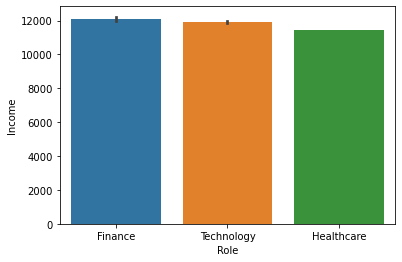

In [72]:
sns.barplot(x='Role',y='Income',data=Top_500)

<AxesSubplot:xlabel='Role', ylabel='Income'>

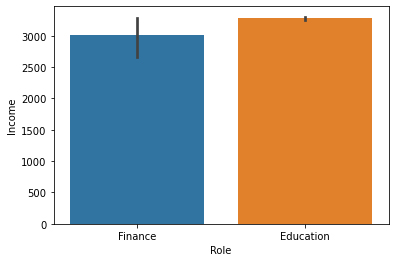

In [73]:
sns.barplot(x='Role',y='Income',data=Low_500)

Well its not surprising but we can conclude that tech sector and roles have the highest pay and education has the lowest average pay.On average tech roles have over double pay of what education sectors are paid.Affter that finance is the higher paid of the 5 fields we are analyzing.

Interestingly enough finance also has lowest paid roles.It may be possible that alot of finance roles are bvased on commision or there maybe major ghgap between each job level.
even when we did the sample of first 500 and last 500 data columnbs this analysis was consistent.

**1. Technology and Finance Dominate Income Levels**
Technology and Finance offer the highest average salaries across all job levels, with Technology starting at $9,085.69 for Entry-level roles.

Actionable Insight:Professionals seeking high-income roles should prioritize entering Technology or Finance sectors.

**2. Education and Media Lag in Income Growth**
Education has the lowest starting salaries (Entry-level: $4,465.83) and negligible growth across levels. Media follows with similarly flat salary progression.

Actionable Insight: These sectors need structural improvements in compensation to attract and retain talent.

**3. Healthcare Has Salary Stability but Limited Growth**
Healthcare roles provide steady but stagnant incomes, with Entry level  7,999.27 and senior $4,465.83

Actionable Insight: Professionals in Healthcare might find career growth through specialization rather than promotions.

**4. Income Growth Between Job Levels is Minimal Across Sectors**
Across sectors, the increase in income from Entry to Senior levels is modest, rarely exceeding a few hundred dollars.

Actionable Insight: Employees may rely on lateral career moves, bonuses, or upskilling to achieve significant salary growth.

**5. Entry-Level Salary Disparity Highlights Sector Inequality**
Entry-level salaries in Technology are nearly double those in Education, revealing a significant disparity between high- and low-paying sectors.

Actionable Insight: Policy interventions may be required to address income inequality across sectors.

**6. Mid-Career Stagnation is a Concern in Most Sectors**
Mid-level salaries in sectors like Education, Media, and Healthcare show minimal growth, leading to potential career stagnation.

Actionable Insight: Mid-career employees in these fields should consider transitioning to higher-paying roles or sectors.

**7. Non-Monetary Benefits May Drive Retention in Low-Paying Sectors**
Sectors like Education and Media might need to focus on offering work-life balance, job security, or meaningful work to retain talent, given their flat salary structures.

Actionable Insight: Employers in these sectors should emphasize intrinsic rewards and professional development opportunities.


# Role ,Level and Income

Lets calculate average pay by job level and field to see if thgere is large gap in pay by level and field

In [74]:

Income_level_role = data.groupby(['Role', 'Job_Level'])['Income'].mean()
print(Income_level_role)

Role        Job_Level
Education   Entry        4465.832398
            Mid          4500.071763
            Senior       4516.469484
Finance     Entry        8525.671838
            Mid          8477.423029
            Senior       8617.626761
Healthcare  Entry        7999.267341
            Mid          8010.240117
            Senior       8005.639296
Media       Entry        5971.364948
            Mid          6011.242138
            Senior       6006.090361
Technology  Entry        9085.688602
            Mid          9142.035433
            Senior       9121.418605
Name: Income, dtype: float64


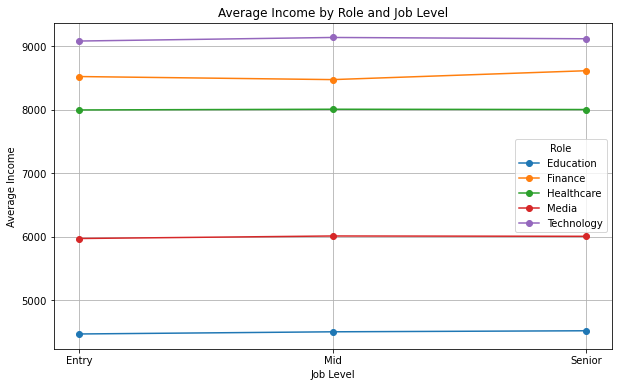

In [75]:
Income_level_role = data.groupby(['Role', 'Job_Level'])['Income'].mean()

# Reset index to make it easier to plot
Income_level_role = Income_level_role.reset_index()

# Create a line plot
plt.figure(figsize=(10,6))

for role in Income_level_role['Role'].unique():
    role_data = Income_level_role[Income_level_role['Role'] == role]
    plt.plot(role_data['Job_Level'], role_data['Income'], marker='o', label=role)

# Customize the plot
plt.title('Average Income by Role and Job Level')
plt.xlabel('Job Level')
plt.ylabel('Average Income')
plt.legend(title='Role')
plt.grid(True)
plt.show()

# Gender pay and job level 

In [76]:
income_gender_joblevel= data.groupby(['Gender','Role','Job_Level',])['Income'].mean()
print(income_gender_joblevel)

Gender  Role        Job_Level
Female  Education   Entry        4446.508929
                    Mid          4494.734095
                    Senior       4537.151292
        Finance     Entry        8495.232558
                    Mid          8353.676630
                    Senior       8669.943590
        Healthcare  Entry        7985.571195
                    Mid          8022.763458
                    Senior       7967.628931
        Media       Entry        5947.287037
                    Mid          6020.073913
                    Senior       6010.963801
        Technology  Entry        9101.856936
                    Mid          9147.978602
                    Senior       9076.226415
Male    Education   Entry        4481.583697
                    Mid          4504.962631
                    Senior       4501.239130
        Finance     Entry        8551.791574
                    Mid          8583.081206
                    Senior       8573.463203
        Healthcare  Entry

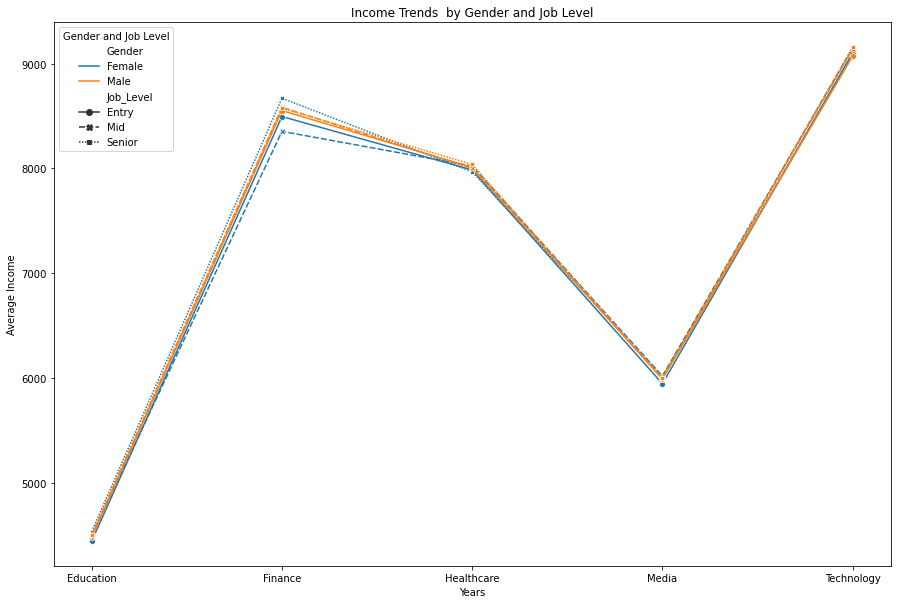

In [77]:
income_gender_joblevel_df = income_gender_joblevel.reset_index()


plt.figure(figsize=(15, 10))
sns.lineplot(data=income_gender_joblevel_df, x='Role', y='Income', hue='Gender', style='Job_Level', markers=True)
plt.title('Income Trends  by Gender and Job Level')
plt.xlabel('Years')
plt.ylabel('Average Income')
plt.legend(title='Gender and Job Level')
plt.show()

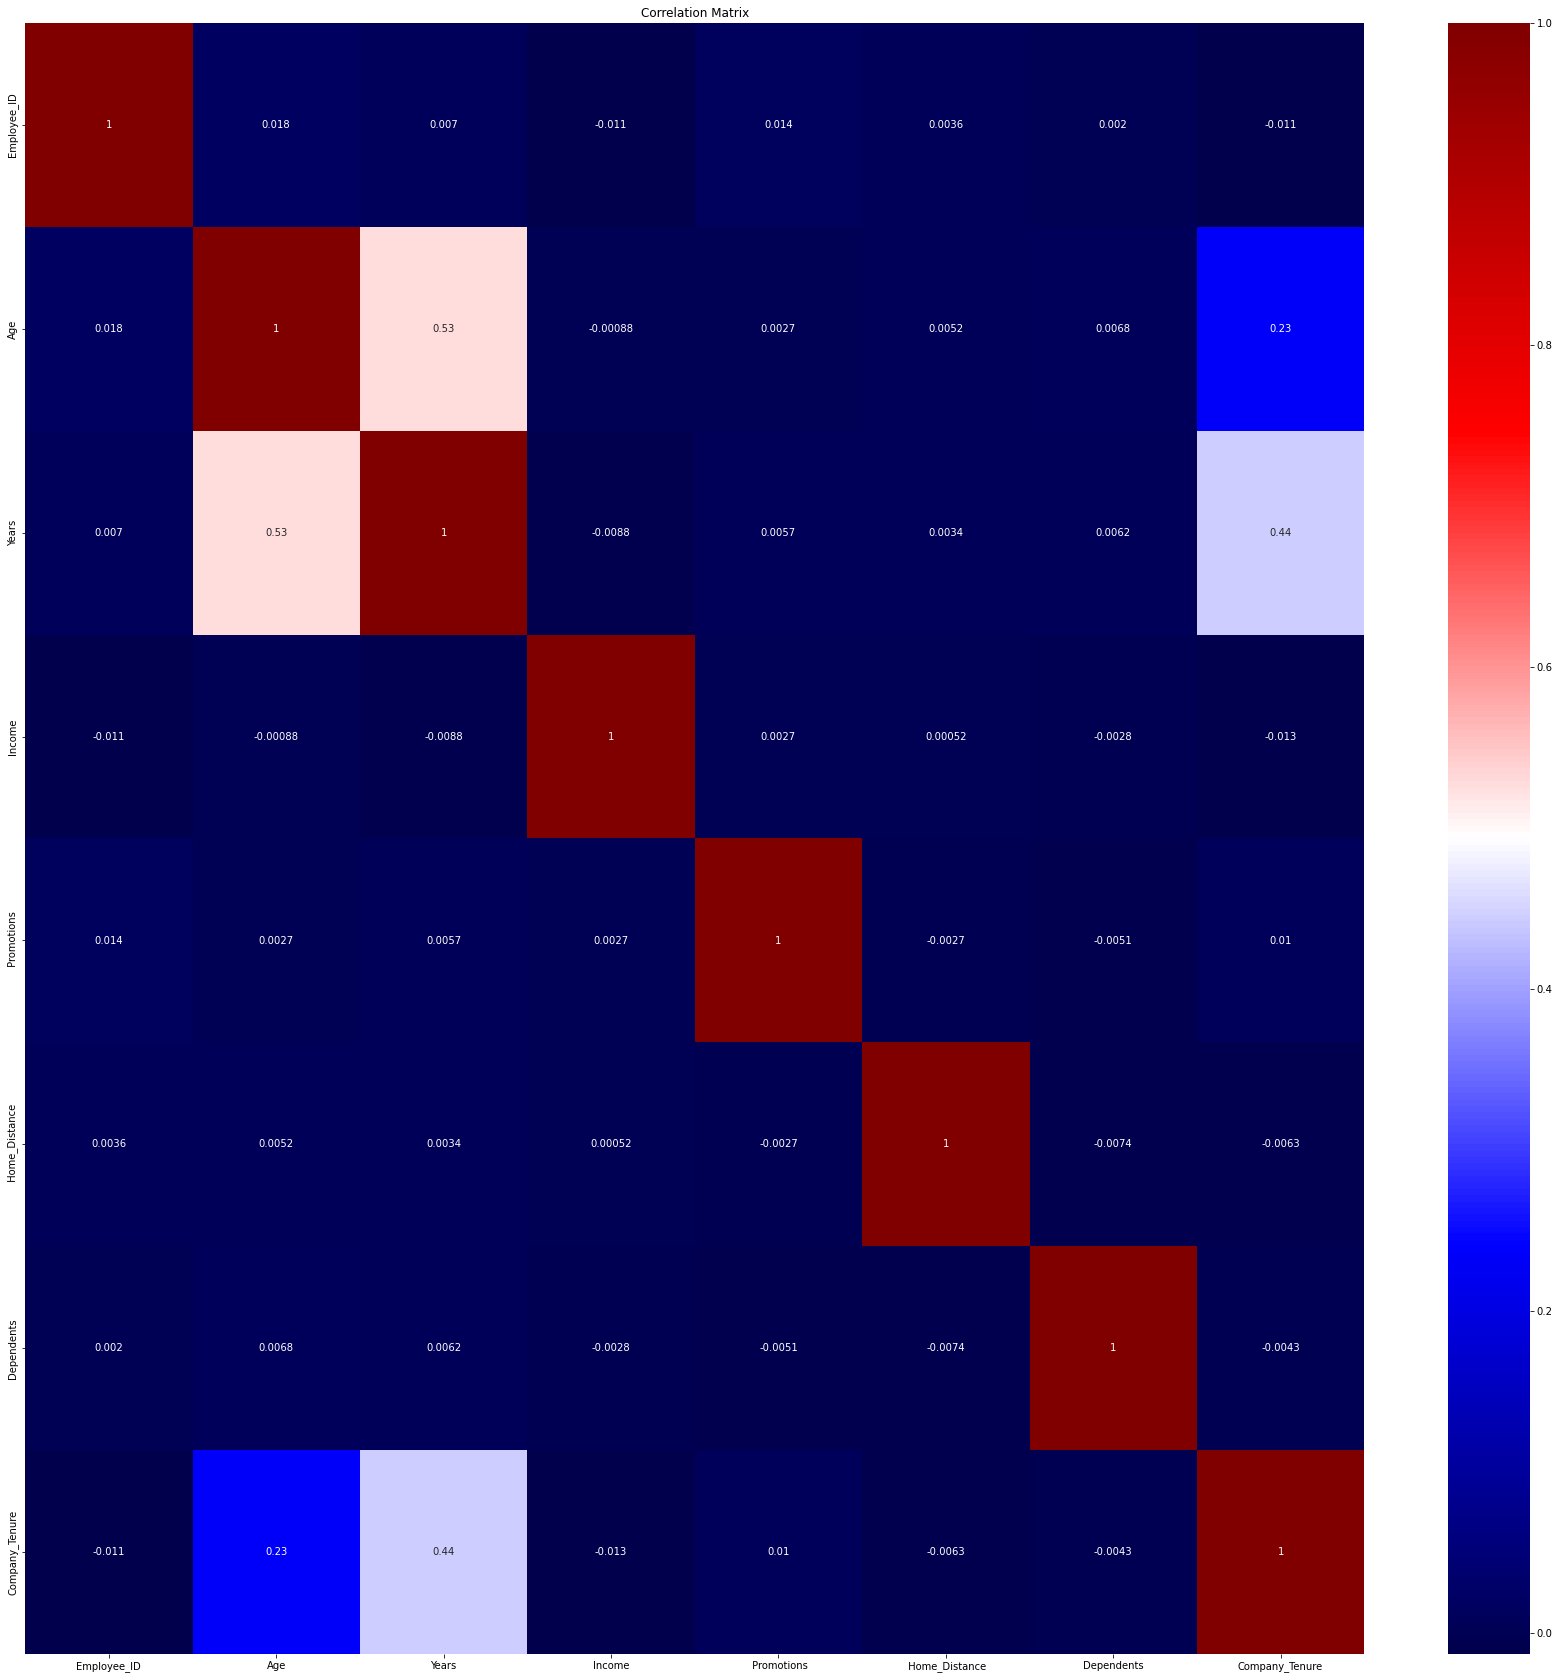

In [78]:
# Correlation matrix
plt.figure(figsize=(30, 30))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title('Correlation Matrix')
plt.show()

**Experience and Tenure**: Employees with more experience (Years) tend to have higher company tenure.We can see a correlation of 0.444 However, this doesn’t directly correlate with income or promotions.

**Minimal Influence of Promotions on Salary**: Promotions and salary (Income) have weak relationships, suggesting that promotions might not always lead to a significant increase in salary within this dataset.This is a very controversial take as we expect wit more responsibiliy comes a higher salary.

**Dependents and Other Variables:** The number of dependents seems to have minimal effect on other variables like salary, tenure, and promotions.There are no significant positive or negative correlation.

**Income and Experience:** There seems to be no clear link between Income and Years, suggesting that income might be more dependent on other factors (role, performance, etc.) than just experience.
These

In [79]:
correlation_matrix = data.corr()

# Apply gradient to the correlation matrix
correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None)

,Employee_ID,Age,Years,Income,Promotions,Home_Distance,Dependents,Company_Tenure
Employee_ID,1.000000,0.017748,0.006994,-0.010606,0.014348,0.003551,0.002005,-0.010541
Age,0.017748,1.000000,0.527232,-0.000879,0.002710,0.005195,0.006844,0.233444
Years,0.006994,0.527232,1.000000,-0.008806,0.005669,0.003360,0.006156,0.444186
Income,-0.010606,-0.000879,-0.008806,1.000000,0.002694,0.000520,-0.002768,-0.012999
Promotions,0.014348,0.002710,0.005669,0.002694,1.000000,-0.002674,-0.005089,0.010153
Home_Distance,0.003551,0.005195,0.003360,0.000520,-0.002674,1.000000,-0.007378,-0.006307
Dependents,0.002005,0.006844,0.006156,-0.002768,-0.005089,-0.007378,1.000000,-0.004300
Company_Tenure,-0.010541,0.233444,0.444186,-0.012999,0.010153,-0.006307,-0.004300,1.000000


# Worklife  balance and job satisfaction

In [81]:
# Perform one-way ANOVA for Performance Rating vs Attrition
f_stat, p_value = stats.f_oneway(
    *(group['Attrition'].eq('Left').astype(int) for _, group in data.groupby('Worklife))
)

# Output the results
print(f"F-statistic: {f_stat}\nP-value: {p_value}")
print("Reject the null hypothesis: Significant differences exist." if p_value < 0.05 else "Fail to reject the null hypothesis: No significant differences.")


SyntaxError: EOL while scanning string literal (3410614097.py, line 3)